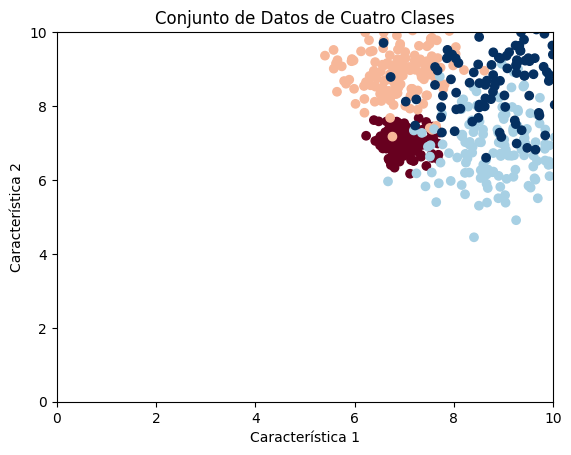

In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 150

# Generación de 4 conjuntos de datos
class_1 = 0.3 * np.random.randn(n_samples, 2) + np.array([7, 7])
class_2 = 0.6 * np.random.randn(n_samples, 2) + np.array([7, 9])
class_3 = 0.9 * np.random.randn(n_samples, 2) + np.array([9, 7])
class_4 = 1.2 * np.random.randn(n_samples, 2) + np.array([9, 9])

# Concatenar los conjuntos de datos
X = np.vstack((class_1, class_2, class_3, class_4))

# Crear etiquetas para los datos
y = np.hstack((np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples)*2, np.ones(n_samples)*3))

# Visualización de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos de Cuatro Clases')
plt.show()

In [33]:
# Paso 2: Encontrar los centros de las neuronas RBF mediante K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
centers = kmeans.cluster_centers_

print(centers)

[[ 8.80914126  5.84124487]
 [ 7.03390105  9.90426288]
 [10.19394537  9.77360087]
 [ 7.25687289  7.23056382]
 [ 7.63195794  9.0559218 ]
 [ 9.81313996  6.71506856]
 [ 6.82199383  8.20553919]
 [ 9.37823322 10.71406081]
 [10.66771763  8.11854382]
 [ 7.48622914  6.35742418]
 [ 8.47681134  8.34662224]
 [ 9.368251    9.11266407]
 [ 5.83315858  8.97619775]
 [ 8.58364697  7.06371952]
 [ 6.71729796  8.98371166]
 [10.91124     5.70237308]
 [ 6.79181639  6.93158719]
 [ 9.36180867  7.66032359]
 [11.43911336  9.30642305]
 [ 8.2929192  10.43253036]]


In [34]:
# Paso 3: Calcular el ancho de los kernels RBF
widths = pairwise_distances_argmin_min(X, centers)[1].mean()

print(widths)

0.3940076173404568


In [35]:
# Paso 4: Calcular las activaciones de las neuronas RBF
def rbf_kernel(x, centers, width):
  return np.exp(-0.5 * (np.linalg.norm(x[:, np.newaxis] - centers, axis=2) / width) ** 2)
# x[:, np.newaxis] es una operación que cambia la forma de la matriz de características
# Esto se hace para poder restar los centros de las neuronas centers, que tiene la forma (n_clusters, n_features)
# np. linalg-norm(x[:, np.newaxis] - centers, axis=2) calcula la norma Euclidiana
# entre cada punto de datos en x y todos los centros de las neuronas.
phi = rbf_kernel(X, centers, widths)
# Convertir phi a una matriz 2D
phi = phi. reshape(-1, n_clusters)
# convertimos la matriz phi a una matriz 2D utilizando .reshape(-1, n_clusters)

In [36]:
# Paso 5: Entrenar un modelo de clasificación en las activaciones de las neuronas RBF
rbf_model = LogisticRegression()
rbf_model. fit (phi, y)

LogisticRegression()

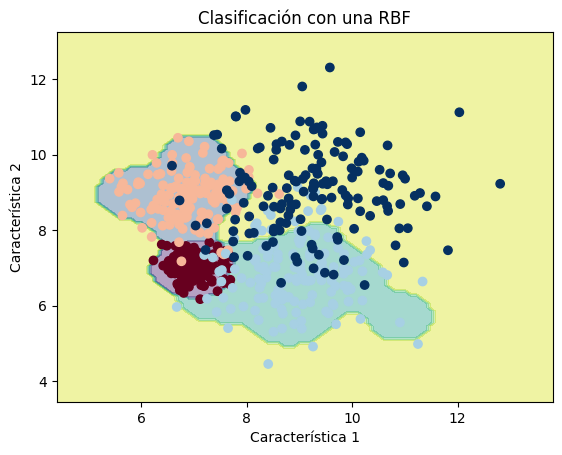

In [37]:
# Generar nuevos datos de prueba
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# se calculan como los valores mínimos y máximos en la columna 0
# (Característica 1) de los datos originales X, con un pequeño ajuste
# hacia abajo y hacia arriba respectivamente.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np. meshgrid(np. arange(x_min, x_max, 0.1), np.arange (y_min, y_max, 0.1))
# se crean utilizando np.meshgrid para crear una malla de puntos en el espacio de características
Z = rbf_model.predict(rbf_kernel(np.c_[xx.ravel(), yy.ravel()], centers, widths))
# Se utiliza el modelo de regresión logística rbf_model previamente entrenado para
# predecir las clases de los nuevos datos generados. Para hacerlo, se calcula el kernel
# RBF para cada punto en la malla (np.c_[xx.ravel(), yy.ravel()]) utilizando la función
#rbf_kernel. Luego, se pasa esta matriz de características a rbf._model. predict para
# obtener las predicciones de clase. Las predicciones se almacenan en la variable Z.
# Visualizar la frontera de decisión
Z = Z. reshape(xx.shape)
plt. contourf(xx, yy, Z, alpha=0.4)
plt. scatter (X[:, 0], X[:, 1], c=y, cmap=plt. cm.RdBu)
plt. xlabel ('Característica 1')
plt. ylabel('Característica 2')
plt. title('Clasificación con una RBF')
plt. show()